## В этом домашнем задании вы сделаете первые шаги в мире линейной бинарной классификации!

In [146]:
import pandas as pd
import numpy as np
import warnings

#### Задание 1

Мы будем работать с данными **Microsoft Malware Detection**

Таргетом будет последний столбец `HasDetection`, который принимает значения $\{0,\, 1\}$ в случае отсутствия или наличия вируса на компьютере соответственно. Признаками будут выступать всевозможные характеристики компьютера.

In [147]:
data = pd.read_csv('train.csv')

C:\Users\Kirill\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [148]:
data.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [149]:
data.dtypes.value_counts()

float64    36
object     30
int64      17
dtype: int64

Удалите константные признаки и признаки `ProductName` `MachineIdentifier`

In [150]:
### Your code is here

# # print(data.shape)
# print(data.columns[data.nunique() == 1])
# # data[['IsBeta', 'PuaMode', 'Census_IsWIMBootEnabled']].isna().sum()

# from sklearn.feature_selection import VarianceThreshold

# numeric_columns = data.loc[:,data.dtypes!=np.object].columns

# cutter = VarianceThreshold()
# cutter.fit(data[numeric_columns])

# print([c for c in numeric_columns if c not in cutter.get_feature_names_out()])

# data[['IsBeta', 'PuaMode', 'Census_IsWIMBootEnabled']]
data = data.drop(['IsBeta', 'PuaMode', 'Census_IsWIMBootEnabled', 'ProductName', 'MachineIdentifier'], axis=1)




Посмотрите на соотношение классов в таргете. Все ли хорошо?

In [151]:
print(sum(data['HasDetections'] == 1), '- positive class,')
print(sum(data['HasDetections'] == 0), '- negative class')

100060 - positive class,
99940 - negative class


Ответьте на вопрос: почему с вашей точки зрения важно иметь представление о балансе классов в ваших данных?

Избавьтесь от пропусков в данных! 

Новый для нас прием: признаки с более чем половиной пропусков следует удалить.

Согласитесь, если в вашей колонке среди 100 объектов всего лишь у 2 есть какое-то непропущенное значение, странно все остальные заполнять средним от этих двух чисел. Такие "редкие" признаки лучше вообще опустить!


В категориальных колонках заменим отсутствующую категорию просто некоторой новой и назовем ее `NaN`.

А в числовых, ради разнообразия, заполним пропуски медианным значением.

In [152]:
### Your code is here

# print(data.shape)
# print(data.columns[data.isna().sum() > (data.shape[0] / 2)])
data = data.drop(data.columns[data.isna().sum() > (data.shape[0] / 2)], axis=1)

In [153]:
categorical_columns = data.loc[:,data.dtypes==np.object].columns
# print(data[categorical_columns].isna().sum())
# print(data[categorical_columns].fillna('NaN').isna().sum())

data[categorical_columns] = data[categorical_columns].fillna('NaN')

C:\Users\Kirill\AppData\Local\Temp/ipykernel_4820/3265448229.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_columns = data.loc[:,data.dtypes==np.object].columns


In [154]:
numeric_columns = data.loc[:,data.dtypes!=np.object].columns
# print(data[numeric_columns].isna().sum())

for c in numeric_columns:
    data[c] = data[c].fillna(data[c].median())

C:\Users\Kirill\AppData\Local\Temp/ipykernel_4820/1379649556.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numeric_columns = data.loc[:,data.dtypes!=np.object].columns


In [155]:
data.isna().sum().sum()

0

Создайте копию полученного датафрейма и положите ее в переменную data_2. Понадобится в следующих заданиях.

In [134]:
data_2 = data.copy()

Так же поработаем над всеми категориальными колонкам перед запуском непосредственно моделей.

Провернем самый базовый и наглый метод - несмотря на количество уникальных значений в каждой категории, просто применим ко всей категориальной части датасета `OneHotEncoding`

In [117]:
### Your code is here

for col in categorical_columns:
    one_hot = pd.get_dummies(data[col], prefix=col, drop_first=True)
    data = pd.concat((data.drop(col, axis=1), one_hot), axis=1)







###  Разделим выборку на тренировочную и тестовую

In [118]:
data_2.shape

(200000, 73)

In [119]:
data_2.dtypes.value_counts()

float64    32
object     25
int64      16
dtype: int64

P.S. в задачах классификации, как и в задаче регрессии, можно использовать технологию Кросс-Валидации. Например, по одному из двух следующих сценариев:

1) Отделить валидацию и тест, произвести подбор лучшей модели с помощью `K-Fold` на валидации, финально обучить выбранную модель на всей валидации и замерить качество на заранее отложенном финальном тесте!

2) Всю выборку назвать валидационной и на ней применить `K-Fold` без финального замера.

В этой домашней работе попросим Вас быть еще проще! :)
Реализуем просто технологию отложенной выборки в пропорции 3:1

In [120]:
from sklearn.model_selection import train_test_split 

X = data.drop(columns=['HasDetections'])
y = data['HasDetections']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=1)

Соберите `Pipeline`, реализовав в нем 2 шага: стандартизация данных через `StandardScaler` и обучение логистической регрессии с помощью `LogisticRegression`, положите результаты в переменную `pipe`, а в классе модели `LogisticRegression` укажите параметр `penalty='none'`

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()),
                 ('LR', LogisticRegression(penalty='none'))])






Чтобы замерить качество работы такой модели на трейне и на тесте воспользуемся функцией `cross_validate`

Вопрос: что передавать ей в параметр cv? Ведь мы уже разделили нашу выборку на трейн и тест (имеем всего 1 fold). Для этого можно просто передать список от кортежа, содержащего индексы тренировочных и тестовых объектов.

In [122]:
from sklearn.model_selection import cross_validate
import datetime

custom_cv = [(X_train.index.to_list(), X_test.index.to_list())]

begin_time = datetime.datetime.now()

cv_result_pipe = cross_validate(pipe, X, y, scoring='accuracy',
                                cv=custom_cv, return_train_score=True)


print(f"Accuracy на трейне: {np.mean(cv_result_pipe['train_score']).round(3)}")
print(f"Accuracy на тесте: {np.mean(cv_result_pipe['test_score']).round(3)}")

print(f"Время работы алгоритма: {datetime.datetime.now() - begin_time}")

C:\Users\Kirill\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy на трейне: 0.651
Accuracy на тесте: 0.623
Время работы алгоритма: 0:03:03.332869


Что можете сказать про время работы алгоритма?

Очевидно, оно достаточно большие. Уж тем более для линейных моделей.

Такое как раз-таки происходит из-за того, что количество фичей, который мы передали нашей модели - гигантское! Классу требуется много времени и памяти, чтобы обработать датасет.

Поэтому те колонки, в которых количество уникальных категорий превышает какое-то адекватное число, следует кодировать иначе, нежели с помощью технологии `One-Hot-Encoding`.

Теперь вы верите, что более умные кодировки зачастую прям необходимы! Раньше мы этот факт не демонстрировали!

Дело еще вот в чем: в классе `LogisticRegression`, как и, например, `Lasso`, есть параметр, ограничивающий максимальное количество итераций во время обучения модели. Так, если данных много и итераций тоже ожидается большое число, найденная разделяющая гиперплоскость может оказаться не самой лучшей, так как наш алгоритм (будь то градиентный спуск или любой иной) просто 'не доползет'. 

#### Задание 2

Теперь попробуем другой метод кодирования категориальных колонок, а именно счётчики.
Построем ту же модель и на том же разделении, просто заново иначе переобработаем датасет. 

Для тех категориальных признаков, у которых количество уникальных значений в колоночках больше 5, применим `MeanTargetEncoding`.

Для остальных оставим любимый `OneHotEncoding` (как делали на практике и в предыдущем уроке).

In [135]:
for col in categorical_columns:
    
    ### К колонкам с маленькой размерностью применим one-hot
    if data_2[col].nunique() < 5:
        one_hot = pd.get_dummies(data_2[col], prefix=col, drop_first=True)
        data_2 = pd.concat((data_2.drop(col, axis=1), one_hot), axis=1)
        
    ### К остальным - счетчики
    else:
        mean_target = data_2.groupby(col)['HasDetections'].mean()
        data_2[col] = data_2[col].map(mean_target)





In [136]:
X_2 = data_2.drop(columns=['HasDetections'])
y_2 = data_2['HasDetections']

Опять обучим модель, пока что без изменений! Скажите, стало ли быстрее? А что с качеством?

In [137]:
### Your code is here
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2,
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=1)



pipe = Pipeline([('scaler', StandardScaler()),
                 ('LR', LogisticRegression(penalty='none'))])

custom_cv = [(X_train.index.to_list(), X_test.index.to_list())]


cv_result_pipe = cross_validate(pipe, X_2, y_2, scoring='accuracy',
                                cv=custom_cv, return_train_score=True)


print(f"Accuracy на трейне: {np.mean(cv_result_pipe['train_score']).round(3)}")
print(f"Accuracy на тесте: {np.mean(cv_result_pipe['test_score']).round(3)}")

Accuracy на трейне: 0.638
Accuracy на тесте: 0.638
Время работы алгоритма: 0:00:02.630094


#### Задание 3: Регуляризация

Как и в моделях регрессии, решая задачу классификации, можем штрафовать минимизируемый функционал за большие веса, добавив к нему L1 или L2 норму весов (все как раньше!).

Для этого в изначальном классе `LogisticRegression` изменить параметр `penalty` на l1 или l2 соответственно. Выберите второй вариант! Можно воспользоваться методом `set_params` и применить его к `pipe`.

In [140]:
### Your code is here
pipe.set_params(LR__penalty='l2')

# cv_result_pipe = cross_validate(pipe, X_2, y_2, scoring='accuracy',
#                                 cv=custom_cv, return_train_score=True)


# print(f"Accuracy на трейне: {np.mean(cv_result_pipe['train_score']).round(3)}")
# print(f"Accuracy на тесте: {np.mean(cv_result_pipe['test_score']).round(3)}")



Pipeline(steps=[('scaler', StandardScaler()), ('LR', LogisticRegression())])

Теперь наша модель будет строить логистическую регрессию с L2 регуляризатором! Помним, что у регуляризируемых моделей есть гиперпараметр, контролирующий силу регуляризации, который выбирается ДО запуска метода fit, то есть заранее, когда модель еще не обучена. 

Конечно же, выбор этого параметра влияет итоговые результаты. Хочется поперебирать различные параметры регуляризации и найти такой, при котором качество на тесте окажется лучшим! 

Сгенерируем массив гиперпараметра, которые планируем перебрать:

In [144]:
alphas = np.linspace(0.01, 100, 100)
alphas

array([1.00000000e-05, 1.10909091e-04, 2.11818182e-04, 3.12727273e-04,
       4.13636364e-04, 5.14545455e-04, 6.15454545e-04, 7.16363636e-04,
       8.17272727e-04, 9.18181818e-04, 1.01909091e-03, 1.12000000e-03,
       1.22090909e-03, 1.32181818e-03, 1.42272727e-03, 1.52363636e-03,
       1.62454545e-03, 1.72545455e-03, 1.82636364e-03, 1.92727273e-03,
       2.02818182e-03, 2.12909091e-03, 2.23000000e-03, 2.33090909e-03,
       2.43181818e-03, 2.53272727e-03, 2.63363636e-03, 2.73454545e-03,
       2.83545455e-03, 2.93636364e-03, 3.03727273e-03, 3.13818182e-03,
       3.23909091e-03, 3.34000000e-03, 3.44090909e-03, 3.54181818e-03,
       3.64272727e-03, 3.74363636e-03, 3.84454545e-03, 3.94545455e-03,
       4.04636364e-03, 4.14727273e-03, 4.24818182e-03, 4.34909091e-03,
       4.45000000e-03, 4.55090909e-03, 4.65181818e-03, 4.75272727e-03,
       4.85363636e-03, 4.95454545e-03, 5.05545455e-03, 5.15636364e-03,
       5.25727273e-03, 5.35818182e-03, 5.45909091e-03, 5.56000000e-03,
      

Чтобы отобрать среди данного массива гиперпараметров лучший, воспользуйтесь конструкцией `GridSearchCV` из `sklearn`

In [145]:
from sklearn.model_selection import GridSearchCV

param_grid ={
    'LR__C': alphas
}

search = GridSearchCV(pipe, param_grid, 
                      cv=custom_cv, scoring='accuracy')

search.fit(X_2, y_2)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)


Best parameter (CV score=0.63850):
{'LR__C': 0.002633636363636364}


#### Задание 4: Бонус

Как вы знаете, подбор признаков является одной из самых важных частей машинного обучения. Сейчас вы попробуете на основе имеющихся признаков сгенерировать новые. В качестве новых признаков будем использовать мономы 2 степени. Можно использовать регуляризацию различного рода, выбор энкодера тоже за вами. Ваша задача - добиться качества `0.65` на тестовой выборке

In [158]:
### Your code is here
for col in numeric_columns:
    data[f'{col}_pow_2'] = data[col] ** 2

In [178]:
data

,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Census_FirmwareManufacturerIdentifier_pow_2,Census_FirmwareVersionIdentifier_pow_2,Census_IsSecureBootEnabled_pow_2,Census_IsVirtualDevice_pow_2,Census_IsTouchEnabled_pow_2,Census_IsPenCapable_pow_2,Census_IsAlwaysOnAlwaysConnectedCapable_pow_2,Wdft_IsGamer_pow_2,Wdft_RegionIdentifier_pow_2,HasDetections_pow_2
0,1.1.15100.1,4.18.1807.18075,1.273.1735.0,7.0,0,53447.0,1.0,1.0,1,29,...,394384.0,1.306389e+09,0,0.0,0,0,0.0,0.0,100.0,0
1,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0,0,53447.0,1.0,1.0,1,93,...,394384.0,3.347548e+09,0,0.0,0,0,0.0,0.0,64.0,0
2,1.1.15100.1,4.18.1807.18075,1.273.1341.0,7.0,0,53447.0,1.0,1.0,1,86,...,20164.0,2.775393e+09,0,0.0,0,0,0.0,0.0,9.0,0
3,1.1.15100.1,4.18.1807.18075,1.273.1527.0,7.0,0,53447.0,1.0,1.0,1,88,...,126025.0,4.020025e+08,0,0.0,0,0,0.0,0.0,9.0,1
4,1.1.15100.1,4.18.1807.18075,1.273.1379.0,7.0,0,53447.0,1.0,1.0,1,18,...,126025.0,3.937843e+08,0,0.0,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1.1.15100.1,4.18.1807.18075,1.273.894.0,0.0,1,3371.0,2.0,1.0,1,160,...,394384.0,8.115092e+08,1,0.0,0,0,0.0,0.0,9.0,0
199996,1.1.15200.1,4.18.1807.18075,1.275.1234.0,7.0,0,53447.0,1.0,1.0,1,60,...,20164.0,2.203551e+09,0,0.0,0,0,1.0,0.0,225.0,0
199997,1.1.15000.2,4.18.1806.18062,1.271.1198.0,7.0,0,62773.0,1.0,1.0,1,9,...,20164.0,1.553264e+08,1,0.0,0,0,0.0,1.0,100.0,0
199998,1.1.15100.1,4.11.15063.447,1.273.438.0,7.0,0,49480.0,2.0,1.0,1,158,...,263169.0,4.024253e+09,1,0.0,0,0,1.0,0.0,1.0,1


In [179]:
data_2 = data.copy()

C:\Users\Kirill\AppData\Local\Temp/ipykernel_4820/1576642089.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numeric_columns = data_2.loc[:,data_2.dtypes!=np.object].columns


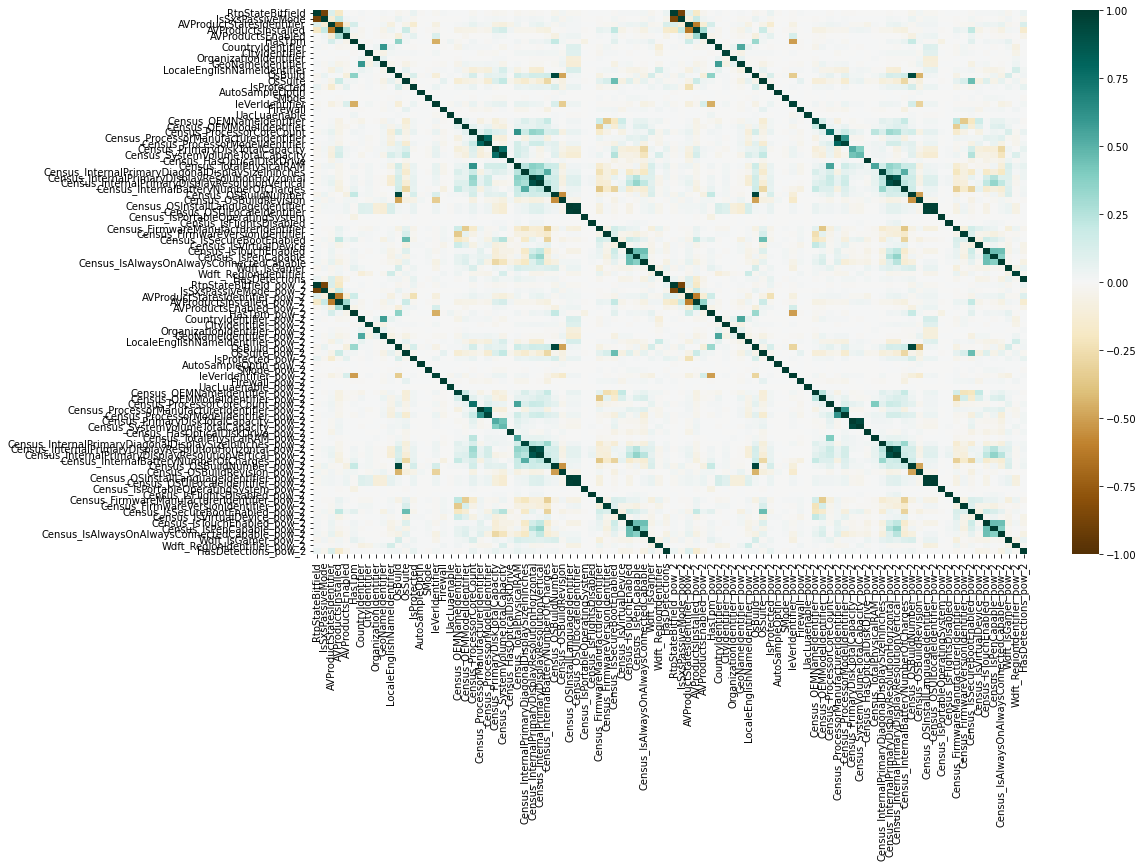

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = data_2.loc[:,data_2.dtypes!=np.object].columns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(data_2[numeric_columns].corr(), 
            xticklabels=numeric_columns,
            yticklabels=numeric_columns,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [182]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

# print("Top Absolute Correlations")
# print(get_top_abs_correlations(data_2[numeric_columns], 60))

In [183]:
### Сворованный со stackoverflow код
### Удалим колонки, где корреляция оказывается > 0.9

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    
correlation(data_2, 0.9)

In [185]:
for col in categorical_columns:
    
    ### К колонкам с маленькой размерностью применим one-hot
    if data_2[col].nunique() < 5:
        one_hot = pd.get_dummies(data_2[col], prefix=col, drop_first=True)
        data_2 = pd.concat((data_2.drop(col, axis=1), one_hot), axis=1)
        
    ### К остальным - счетчики
    else:
        mean_target = data_2.groupby(col)['HasDetections'].mean()
        data_2[col] = data_2[col].map(mean_target)

In [186]:
X_2 = data_2.drop(columns=['HasDetections'])
y_2 = data_2['HasDetections']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2,
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=1)



pipe = Pipeline([('scaler', StandardScaler()),
                 ('LR', LogisticRegression(penalty='l2'))])

custom_cv = [(X_train.index.to_list(), X_test.index.to_list())]


# cv_result_pipe = cross_validate(pipe, X_2, y_2, scoring='accuracy',
#                                 cv=custom_cv, return_train_score=True)


# print(f"Accuracy на трейне: {np.mean(cv_result_pipe['train_score']).round(3)}")
# print(f"Accuracy на тесте: {np.mean(cv_result_pipe['test_score']).round(3)}")

In [198]:
alphas = np.linspace(0.01, 20, 30)
alphas

array([1.00000000e-02, 6.99310345e-01, 1.38862069e+00, 2.07793103e+00,
       2.76724138e+00, 3.45655172e+00, 4.14586207e+00, 4.83517241e+00,
       5.52448276e+00, 6.21379310e+00, 6.90310345e+00, 7.59241379e+00,
       8.28172414e+00, 8.97103448e+00, 9.66034483e+00, 1.03496552e+01,
       1.10389655e+01, 1.17282759e+01, 1.24175862e+01, 1.31068966e+01,
       1.37962069e+01, 1.44855172e+01, 1.51748276e+01, 1.58641379e+01,
       1.65534483e+01, 1.72427586e+01, 1.79320690e+01, 1.86213793e+01,
       1.93106897e+01, 2.00000000e+01])

In [ ]:
param_grid ={
    'LR__C': alphas
}

search = GridSearchCV(pipe, param_grid, 
                      cv=custom_cv, scoring='accuracy')

search.fit(X_2, y_2)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

C:\Users\Kirill\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Kirill\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Kirill\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Kirill\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Kirill\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Kirill\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

In [181]:
data_2.shape

(200000, 121)

In [184]:
data_2

,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,Census_ProcessorCoreCount_pow_2,Census_PrimaryDiskTotalCapacity_pow_2,Census_TotalPhysicalRAM_pow_2,Census_InternalPrimaryDisplayResolutionVertical_pow_2
0,1.1.15100.1,4.18.1807.18075,1.273.1735.0,7.0,0,53447.0,1.0,1.0,1,29,...,0,0,0.0,0.0,10.0,0,16.0,2.274718e+11,16777216.0,810000.0
1,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0,0,53447.0,1.0,1.0,1,93,...,0,0,0.0,0.0,8.0,0,16.0,2.274718e+11,16777216.0,589824.0
2,1.1.15100.1,4.18.1807.18075,1.273.1341.0,7.0,0,53447.0,1.0,1.0,1,86,...,0,0,0.0,0.0,3.0,0,16.0,1.310407e+10,16777216.0,1166400.0
3,1.1.15100.1,4.18.1807.18075,1.273.1527.0,7.0,0,53447.0,1.0,1.0,1,88,...,0,0,0.0,0.0,3.0,1,16.0,5.687033e+10,16777216.0,589824.0
4,1.1.15100.1,4.18.1807.18075,1.273.1379.0,7.0,0,53447.0,1.0,1.0,1,18,...,0,0,0.0,0.0,1.0,1,16.0,2.274718e+11,37748736.0,589824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1.1.15100.1,4.18.1807.18075,1.273.894.0,0.0,1,3371.0,2.0,1.0,1,160,...,0,0,0.0,0.0,3.0,0,16.0,9.098661e+11,16777216.0,589824.0
199996,1.1.15200.1,4.18.1807.18075,1.275.1234.0,7.0,0,53447.0,1.0,1.0,1,60,...,0,0,1.0,0.0,15.0,0,16.0,8.892324e+08,4194304.0,589824.0
199997,1.1.15000.2,4.18.1806.18062,1.271.1198.0,7.0,0,62773.0,1.0,1.0,1,9,...,0,0,0.0,1.0,10.0,0,16.0,2.274718e+11,16777216.0,1166400.0
199998,1.1.15100.1,4.11.15063.447,1.273.438.0,7.0,0,49480.0,2.0,1.0,1,158,...,0,0,1.0,0.0,1.0,1,16.0,3.556930e+09,16777216.0,640000.0
